In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Covariance functions

def sq_exp(x, xpr, l):
    dist = np.abs(x - xpr.T)
    return np.exp(-(dist/l)**2)

def cosine(x, xpr, p):
    dist = np.abs(x - xpr.T)
    return np.cos(2*np.pi*dist/p)

### Generate random sample via standard GPs

Text(0.5, 0, 'time')

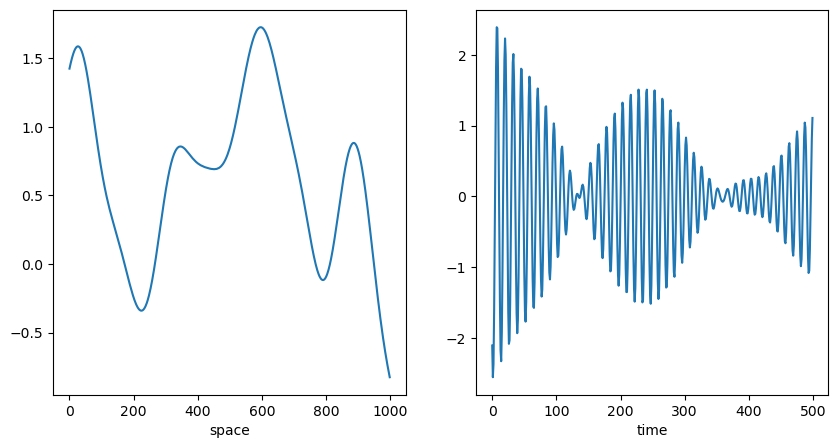

In [3]:
n_space = 1000
n_time = 500

l_space = n_space/10
l_time = 100
p_time = 12.42
sigma = 1
nugget = 1e-8

t_space = np.arange(n_space)[:, None]
t_time = np.arange(n_time)[:, None]

Cov_space = sq_exp(t_space, t_space, l_space) + nugget * np.eye(n_space)
Cov_time = sq_exp(t_time, t_time, l_time) * cosine(t_time, t_time, p_time) + nugget * np.eye(n_time)

Y_space = np.random.multivariate_normal(np.repeat(0, n_space), Cov_space)
Y_time = np.random.multivariate_normal(np.repeat(0, n_time), Cov_time)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(t_space.flatten(), Y_space)
plt.xlabel("space")
plt.subplot(122)
plt.plot(t_time.flatten(), Y_time)
plt.xlabel("time")

### Generate random sample from Cholesky decomposition
Define $L$ as any square-root decomposition (here, a Cholesky decomposition) of $\Sigma$, so that $\Sigma = L L^\intercal$. Note that $L \epsilon$ follows a $\mathcal{N}(0, \Sigma)$ distribution, where $\epsilon \sim \mathcal{N}(0,I)$. Hence, we may obtain a draw from $\mathcal{N}(0, \Sigma)$ by instead drawing $\epsilon \sim \mathcal{N}(0,I)$ and computing $L \epsilon$.

Text(0.5, 0, 'time')

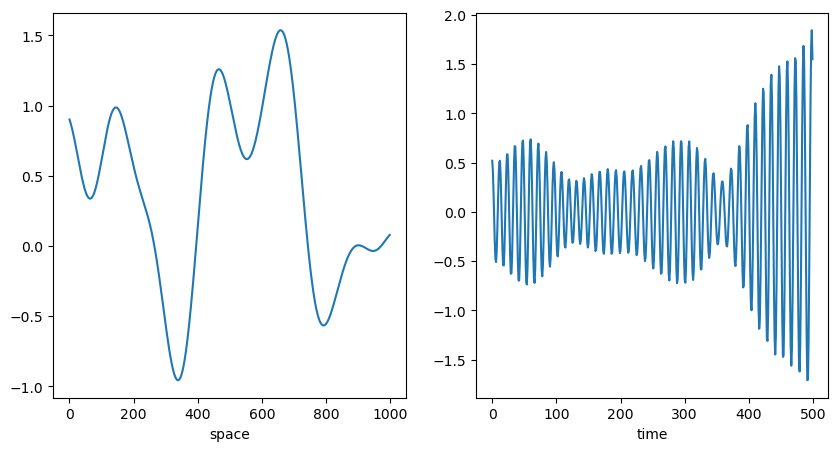

In [4]:
Ls = np.linalg.cholesky(Cov_space)
Lt = np.linalg.cholesky(Cov_time)
Y_space = Ls @ np.random.normal(size = n_space)[:,None]
Y_time = Lt @ np.random.normal(size = n_time)[:,None]

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(t_space.flatten(), Y_space)
plt.xlabel("space")
plt.subplot(122)
plt.plot(t_time.flatten(), Y_time)
plt.xlabel("time")

### Generate joint random sample using Cholesky and Kronecker tricks
Define $Y \in \mathbb{R}^{n_s \times n_t}$ as our joint space-time observation. If space and time are seperable then we can describe them by a matrix normal distribution $Y \sim \mathcal{MN}(0, \Sigma_s, \Sigma_t)$, which is equivalent to $\mathrm{vec}(Y) \sim \mathcal{N}(0, \Sigma_t \otimes \Sigma_s)$. A random draw of $Y$ may thus be calculated as $(L_t \otimes L_s) * \mathrm{vec}(\epsilon)$ where $\epsilon \sim \mathcal{MN}(0, I_{n_s}, I_{n_t})$, i.e. a $n_s \times n_t$ matrix of iid Gaussians. Here we have made use of the fact that $\mathrm{chol}(A \otimes B) = \mathrm{chol}(A) \otimes \mathrm{chol}(B)$. The matrix-vector product of a Kronecker matrix is $(A \otimes B) * \mathrm{vec}(V) = \mathrm{vec}(BVA^\intercal)$, and so we efficiently compute $(L_t \otimes L_s) * \epsilon = \mathrm{vec}(L_t V L_s^\intercal)$

Text(0, 0.5, 'space')

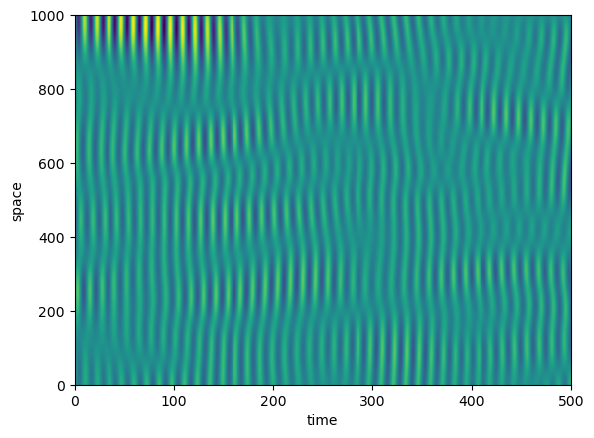

In [5]:
V = np.random.normal(size = n_space * n_time).reshape((n_space, n_time))
sample = Ls @ V @ Lt.T
plt.pcolormesh(sample)
plt.xlabel("time")
plt.ylabel("space")